In [1]:
from sunpy.map import Map
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from scipy import ndimage
import datetime
import glob
import sunpy.coordinates as coordinates
from astropy.table import Table

In [2]:

file_list = []
file_list.append(glob.glob('*.i*.fits'))
file_list=sorted(file_list)

files=Map(file_list)

Int_Inc = []
tiempos = []
for i in range(20):
    diff = files[i+1].data-files[i].data
    Mdiff = Map(np.nan_to_num(np.abs(diff)),files[i].meta)
# Correct by the rotation of the spacecraft and instrument.
    Mdiffrot = Mdiff.rotate(angle=Mdiff.meta['crota2'] * u.deg)
    mask = Mdiffrot.data > 10
    Gdiff = ndimage.gaussian_filter(Mdiffrot.data,40)
    Gmask = Gdiff > Gdiff.max()*0.5
    labels, n = ndimage.label(Gdiff*Gmask)
    flaremask = (labels==2)
    MapFlareMask = Map(Mdiffrot.data*flaremask,files[i].meta)
    Mdiffrot_ti = Mdiffrot
    Int_Inc.append((Mdiffrot_ti.data*flaremask).sum())
    tiempos.append(datetime.datetime.strptime(Mdiffrot_ti.meta["date-obs"],'%Y-%m-%dT%H:%M:%S.%f'))


a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating

a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating

In [7]:

print(tiempos)

[datetime.datetime(2013, 11, 8, 6, 10, 13), datetime.datetime(2013, 11, 8, 2, 22, 13), datetime.datetime(2013, 11, 8, 6, 22, 13), datetime.datetime(2013, 11, 8, 5, 46, 13), datetime.datetime(2013, 11, 8, 3, 58, 13), datetime.datetime(2013, 11, 8, 4, 34, 13), datetime.datetime(2013, 11, 8, 4, 58, 13), datetime.datetime(2013, 11, 8, 4, 46, 13), datetime.datetime(2013, 11, 8, 5, 34, 13), datetime.datetime(2013, 11, 8, 3, 10, 13), datetime.datetime(2013, 11, 8, 3, 22, 13), datetime.datetime(2013, 11, 8, 3, 34, 13), datetime.datetime(2013, 11, 8, 2, 58, 13), datetime.datetime(2013, 11, 8, 2, 46, 13), datetime.datetime(2013, 11, 8, 5, 22, 13), datetime.datetime(2013, 11, 8, 5, 10, 13), datetime.datetime(2013, 11, 8, 4, 22, 13), datetime.datetime(2013, 11, 8, 4, 10, 13), datetime.datetime(2013, 11, 8, 2, 34, 13), datetime.datetime(2013, 11, 8, 3, 46, 13)]


In [8]:
print(Int_Inc)

[4463817.854218604, 4495327.009074765, 16718.18427678778, 4120352.4029973485, 16212.774251111381, 15886.677812818967, 2310362.1777649564, 20311.357893291377, 4209672.661837016, 26255.00118807019, 17912.50341797114, 22908.071774643427, 17104.109174858513, 4275841.01413233, 2300167.8127443953, 6650.236587423156, 14145.812919240883, 4236622.492708161, 4232098.354654373, 4198665.127495243]


In [9]:
import sunpy.timeseries as ts

tbl_meta = {'t_key':'t_value'}
table = Table([tiempos, Int_Inc], names=['time', 'intensity'], meta=files[i].meta)
table.add_index('time')
ts_table = ts.TimeSeries(table)

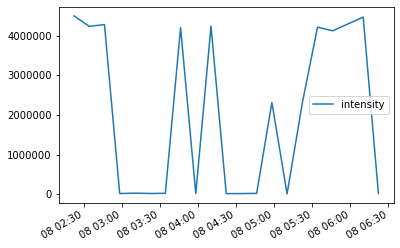

In [10]:
ts_table.peek()